In [123]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import os
from scipy.interpolate import interp1d


In [20]:
issue_general_frames = ['Capacity and Resources','Crime and Punishment', 'Cultural Identity', 'Economic',
                        'External Regulation and Reputation', 'Fairness and Equality',
                        'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
                        'Morality and Ethics', 'Policy Prescription and Evaluation',
                        'Political Factors and Implications', 'Public Sentiment',
                        'Quality of Life', 'Security and Defense']
issue_specific_frames = ['Threat: Fiscal','Threat: Jobs', 'Threat: National Cohesion', 'Threat: Public Order',
                         'Victim: Discrimination', 'Victim: Global Economy','Victim: Humanitarian', 'Victim: War',
                         'Hero: Cultural Diversity', 'Hero: Integration','Hero: Worker']
narrative_frames = ['Episodic','Thematic']
all_frames = issue_general_frames + issue_specific_frames + narrative_frames + ['Victim','Hero','Threat']

In [21]:
#Read full datasheet here
df = pd.read_csv('/shared/2/projects/framing/results/full_datasheet_11-13-20.tsv',sep='\t')
#df = pd.read_csv('/shared/2/projects/framing/results/data_5_percent_11-13-20.tsv',sep='\t')

In [23]:
out_dir = '/shared/2/projects/framing/results/plots/temporal/'

In [24]:
#Convert to datetime object
df["Day"] = df["month"].astype(str) + '-' + df["date"].astype(str) + '-' + df['year'].astype(str)
df['Day'] = pd.to_datetime(df['Day'], format="%m-%d-%Y")

In [25]:
# Get aggregate counts of tweets over weeks
df_counts = df.groupby('Day').count().max(axis=1).reset_index()
df_counts.columns = ['Day','Count']
df_counts['Week'] = pd.to_datetime(df_counts['Day']) - pd.to_timedelta(7,unit='d')
df_weekly_count = df_counts.groupby([pd.Grouper(key='Week', freq='W-MON')]).sum().reset_index().sort_values('Week')


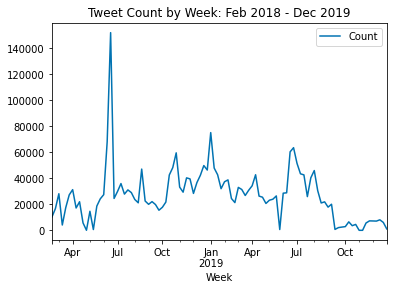

In [27]:
#Amount of data per week (can reflect both immigration discourse, but also available decahose data)
df_weekly_count.plot.line(x='Week',y='Count')
plt.title('Tweet Count by Week: Feb 2018 - Dec 2019')
#plt.savefig(os.path.join(out_dir,'tweet_count_by_week.pdf'),bbox_inches='tight')
plt.show()

In [118]:
# Aggregate frame df by week 
#df ratio is fraction of all tweets in a week that contains a certain frame
df['Week'] = pd.to_datetime(df['Day']) - pd.to_timedelta(7,unit='d')
df_weekly = df.groupby([pd.Grouper(key='Week', freq='W-MON')])[all_frames].sum().reset_index()
df_weekly = df_weekly.merge(df_weekly_count,on='Week').set_index('Week')
df_weekly = df_weekly.loc[(df_weekly.sum(axis=1) != 0)] #some weeks have no tweets
df_ratio =  df_weekly[all_frames].div(df_weekly.Count,axis=0).reset_index()

In [147]:
def plot_frames_over_time(df,ix,frame_list,title,out_file,bbox=(1,1)):
    sns.set_palette('colorblind')
    df1 = df[frame_list + [ix]]
    df1 = df1.groupby(ix).agg('sum').reset_index()
    ax = df1.plot.line(x=ix)

    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,1))
    plt.legend(bbox_to_anchor=bbox)
    plt.xticks(rotation=25)
    if len(frame_list) == 1:
        ax.get_legend().remove()


    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()


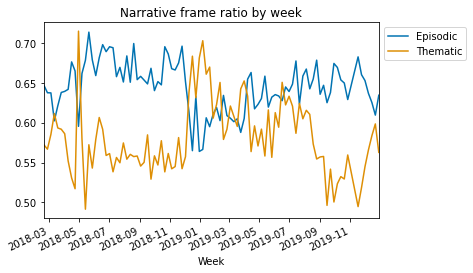

In [148]:
out_file = os.path.join(out_dir,'narrative_week_ratio.pdf')
plot_frames_over_time(df_ratio,'Week',narrative_frames,'Narrative frame ratio by week',out_file =out_file)

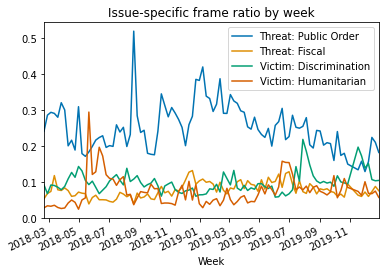

In [165]:
out_file = os.path.join(out_dir,'issue_specific_subset_week_ratio.pdf')
frame_list = ['Threat: Public Order','Threat: Fiscal','Victim: Discrimination','Victim: Humanitarian']
#frame_list= issue_specific_frames
plot_frames_over_time(df_ratio,'Week',frame_list,'Issue-specific frame ratio by week',out_file =out_file)

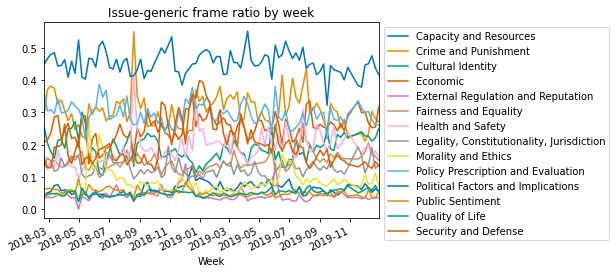

In [158]:
out_file = os.path.join(out_dir,'issue_generic_all_week_ratio.pdf')
frame_list = ['Political Factors and Implications','Crime and Punishment','Economic','Fairness and Equality','Morality and Ethics']
frame_list = issue_general_frames
plot_frames_over_time(df_ratio,'Week',frame_list,'Issue-generic frame ratio by week',out_file =out_file,bbox=(1,1))

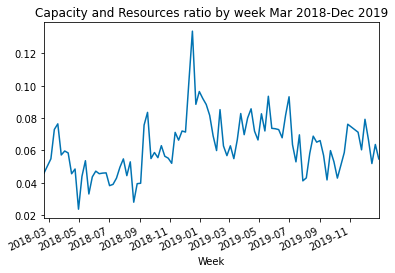

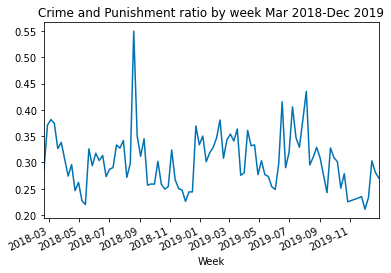

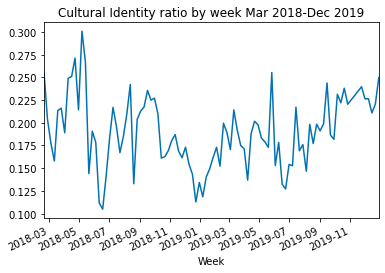

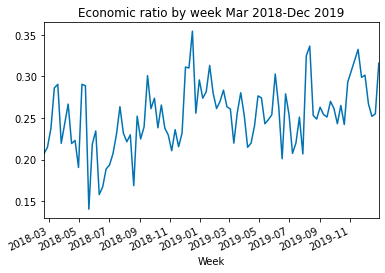

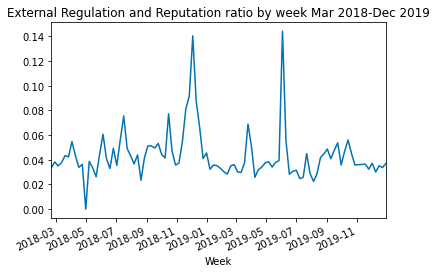

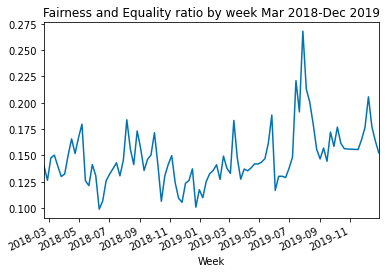

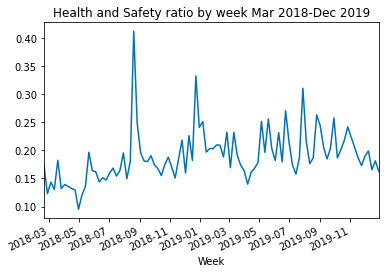

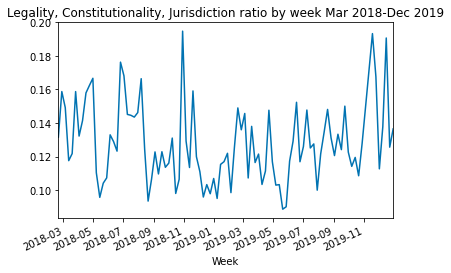

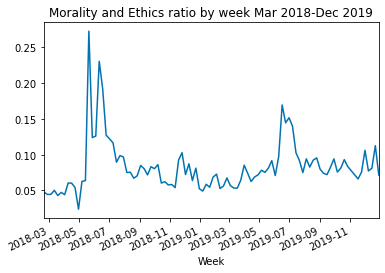

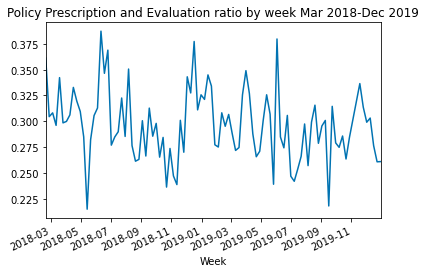

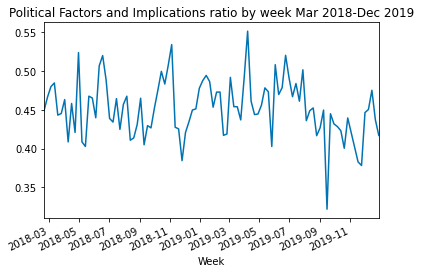

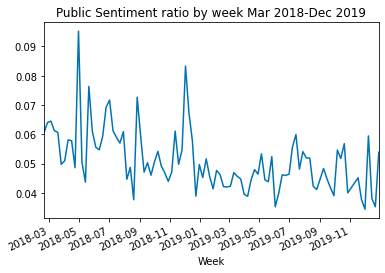

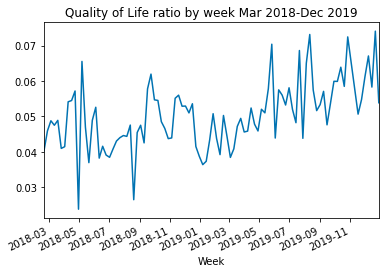

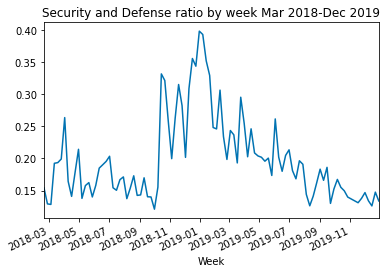

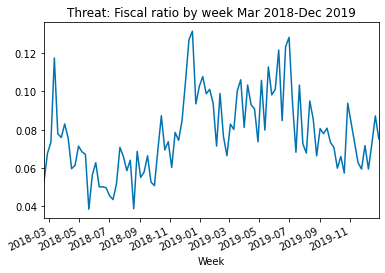

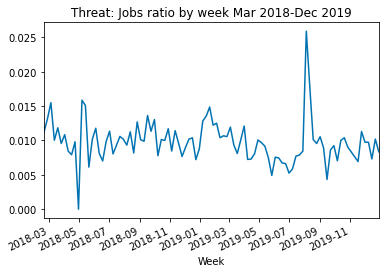

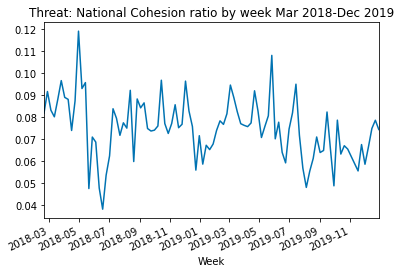

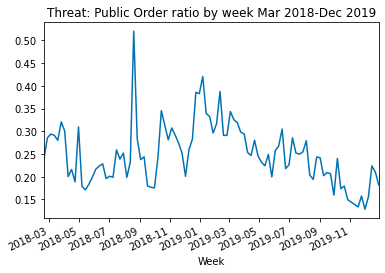

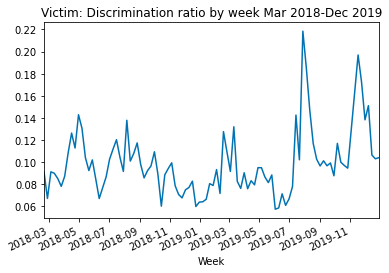

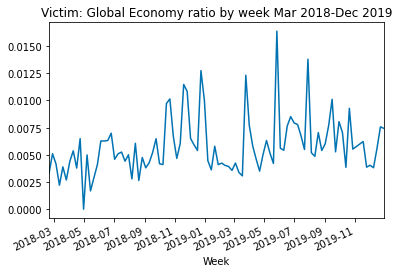

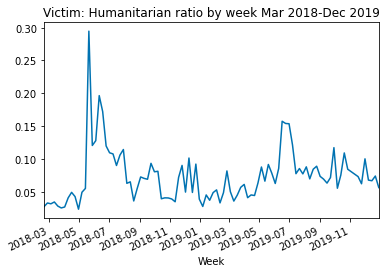

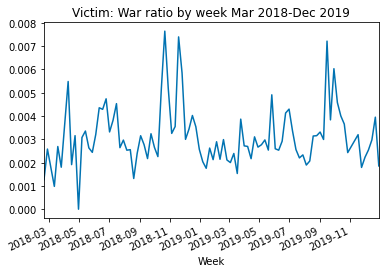

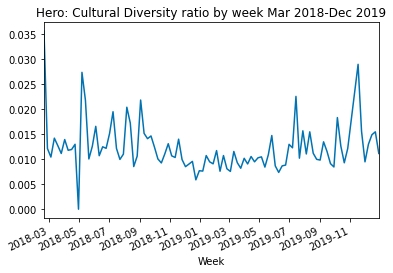

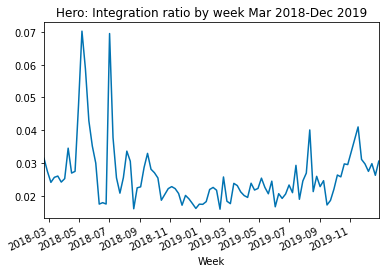

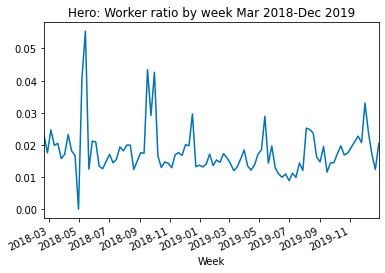

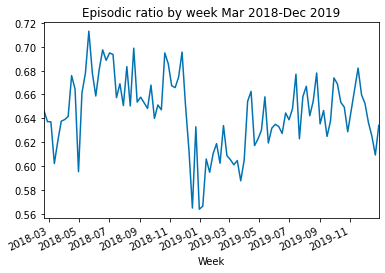

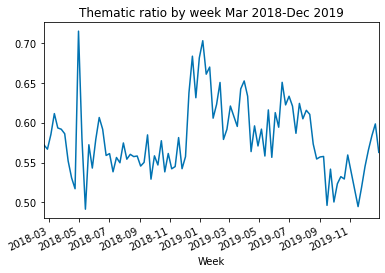

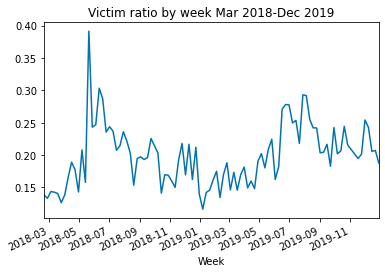

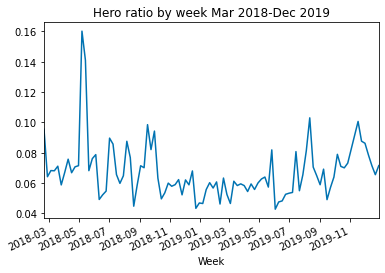

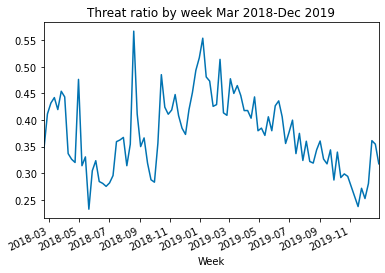

In [151]:
for frame in all_frames:
    frame_name = frame.replace(':','').replace(',','').replace(' ','-')
    out_file = os.path.join(out_dir,f'{frame_name}_week_ratio.pdf')
    plot_frames_over_time(df_ratio,'Week',[frame],f'{frame} ratio by week Mar 2018-Dec 2019',out_file=out_file)

In [164]:
df_weekly.sum().sort_values(ascending=False)

Count                                        2661436
Episodic                                     1718540
Thematic                                     1586577
Political Factors and Implications           1241686
Threat                                       1042733
Crime and Punishment                          842327
Policy Prescription and Evaluation            802216
Threat: Public Order                          725791
Economic                                      650218
Security and Defense                          588734
Victim                                        541978
Health and Safety                             517436
Cultural Identity                             449890
Fairness and Equality                         373211
Legality, Constitutionality, Jurisdiction     334371
Morality and Ethics                           247193
Victim: Discrimination                        243686
Victim: Humanitarian                          216813
Threat: Fiscal                                

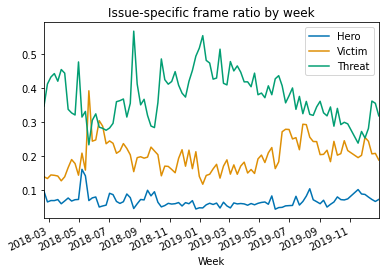

In [166]:
out_file = os.path.join(out_dir,'hero_victim_threat_week_ratio.pdf')
frame_list = ['Hero','Victim','Threat']
#frame_list= issue_specific_frames
plot_frames_over_time(df_ratio,'Week',frame_list,'Issue-specific frame ratio by week',out_file =out_file)

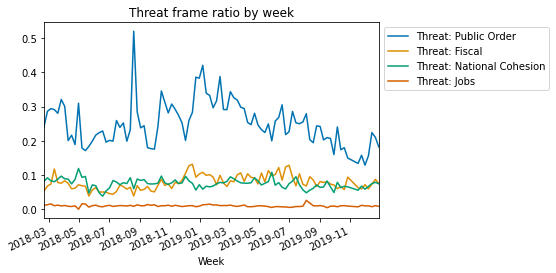

In [170]:
out_file = os.path.join(out_dir,'threat_week_ratio.pdf')
frame_list = ['Threat: Public Order','Threat: Fiscal', 'Threat: National Cohesion', 'Threat: Jobs']
#frame_list= issue_specific_frames
plot_frames_over_time(df_ratio,'Week',frame_list,'Threat frame ratio by week',out_file =out_file)